# Curve Fitting

[[1.         1.76433493]
 [1.76433493 8.23919354]]
[1.17557587 5.49062021]
[[1.         1.76433493]
 [0.         5.1263158 ]]
[1.17557587 3.41651064]
[-2.91805659e-04  6.66465113e-01]


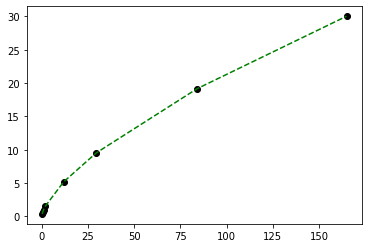

In [1]:
import numpy as np
import math
from pylab import *
n=2
x_mean=xsq_mean=y_mean=xy_mean=0.0
y_list=np.array([0.387, 0.723, 1.000, 1.524, 5.203, 9.516, 19.166, 30.012])
x_list=np.array([0.241, 0.615, 1.000, 1.881, 11.862, 29.458, 84.013, 164.793])
l = np.array([0.241, 0.615, 1.000, 1.881, 11.862, 29.458, 84.013, 164.793])
z = np.array([0.387, 0.723, 1.000, 1.524, 5.203, 9.516, 19.166, 30.012])
y_newlist = []
p_list= []
for i in range(0,8):
    x_list[i]=math.log(x_list[i])
    y_list[i]=math.log(y_list[i])

for i in range(0,8):
    x_mean+=x_list[i]
    xsq_mean+=x_list[i]**2
    y_mean+=y_list[i]
    xy_mean+=x_list[i]*y_list[i]
x_mean=x_mean/8.0
xsq_mean=xsq_mean/8.0
y_mean=y_mean/8.0
xy_mean=xy_mean/8.0
a=np.array([ [1., x_mean] , [x_mean, xsq_mean] ])
b=np.array([ y_mean, xy_mean ])
print(a)
print(b)
for k in range(0,n-1):
    for i in range(k+1,n):
        b[i] -= (( (a[i][k])/(a[k][k]) ) * b[k])
        c=(a[i][k]/a[k][k])
        for j in range(k,n):
            a[i][j]-= c*a[k][j]
print(a)
print(b)
X= np.array([0.0,0.0])
for i in range((n-1),-1,-1):
    X[i] = (b[i])/(a[i][i])
    for j in range(0,n):
        if(i!=j):
            X[i]-= (a[i][j]*X[j])/(a[i][i])
print(X)

def y(x):
    return X[1]*x + X[0]
x_newlist = linspace(-2,6,1000)
for m in x_newlist:
    y_newlist.append(y(m))
#plot(x_newlist,y_newlist,'g--')
#scatter(x_list,y_list,color = 'k')

"To plot a = CT^n"
def a(T):
    return (exp(X[0]))*(pow(T,X[1]))
for i in l:
    p_list.append(a(i))
plot(l,p_list,'g--')
scatter(l,z,color='k')
    

    